In [1]:
print("HI")

HI


In [2]:
!pip install pandas matplotlib seaborn plotly scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
iris = sns.load_dataset("iris")        # small numeric dataset
tips = sns.load_dataset("tips")        # billing & tips dataset
mpg = sns.load_dataset("mpg").dropna() # mpg has some missing values
titanic = sns.load_dataset("titanic").dropna(subset=['age','fare']) # for bar / groupby demos
iris.head()
# Datasets used: iris, tips, mpg, titanic

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()
tips.info()
mpg.info()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 K

In [7]:
iris.describe()
tips.describe()
mpg.describe()
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
# setting up a white background with grid lines and notebook-sized elements as the global theme for all Seaborn/Matplotlib plots in that session.
sns.set(style="dark", context="notebook") 

In [9]:
print("Iris shape:", iris.shape)
print("Tips shape:", tips.shape)
print("MPG shape:", mpg.shape)
print("Titanic shape:", titanic.shape)

Iris shape: (150, 5)
Tips shape: (244, 7)
MPG shape: (392, 9)
Titanic shape: (714, 15)


# Scatter plot (Matplotlib) — iris

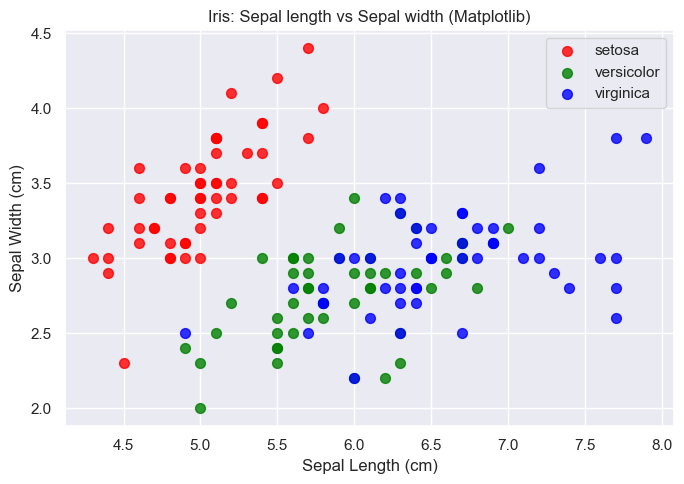

In [ ]:
plt.figure(figsize=(7,5))
colors = {'setosa':'red','versicolor':'green','virginica':'blue'}

for species, group in iris.groupby('species'):
    plt.scatter(group['sepal_length'], group['sepal_width'],
                label=species, alpha=0.8, s=50, color=colors[species])  # color by species issue fixed
    
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris: Sepal length vs Sepal width (Matplotlib)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

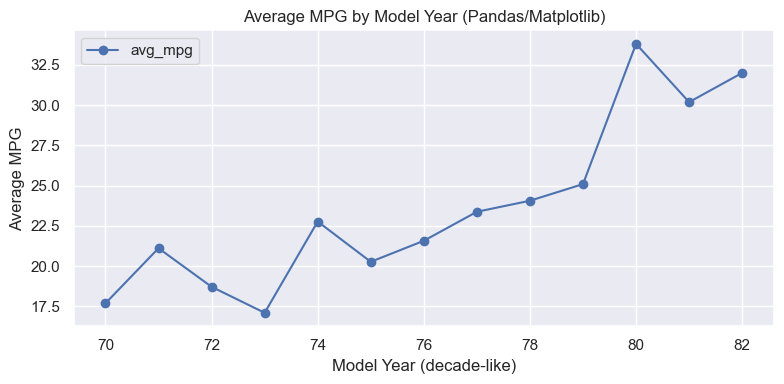

In [11]:
# %% 
# Prepare data: average mpg by model year
mpg_grouped = mpg.groupby('model_year', as_index=False)['mpg'].mean()
mpg_grouped.columns = ['model_year', 'avg_mpg']
mpg_grouped.head()

# Line plot using Pandas plotting (Matplotlib backend)
ax = mpg_grouped.plot(x='model_year', y='avg_mpg', kind='line', marker='o', figsize=(8,4))
ax.set_xlabel("Model Year (decade-like)")
ax.set_ylabel("Average MPG")
ax.set_title("Average MPG by Model Year (Pandas/Matplotlib)")
plt.grid(True)
plt.tight_layout()
plt.show()


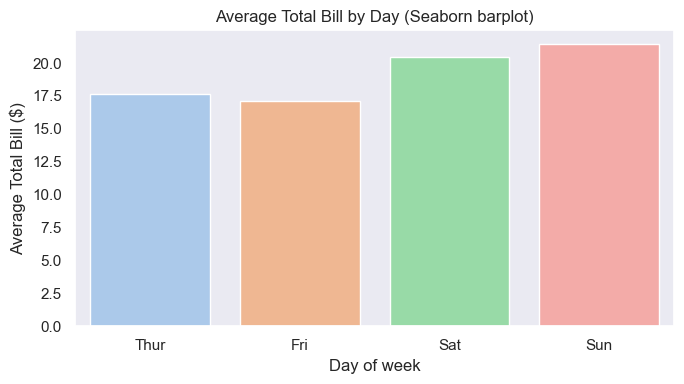

In [12]:
tips_grouped = tips.groupby('day', as_index=False, observed=False)['total_bill'].mean() \
                   .sort_values('total_bill', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=tips_grouped, x='day', y='total_bill', hue='day',
            palette='pastel', legend=False)
plt.xlabel('Day of week')
plt.ylabel('Average Total Bill ($)')
plt.title('Average Total Bill by Day (Seaborn barplot)')
plt.tight_layout()
plt.show()


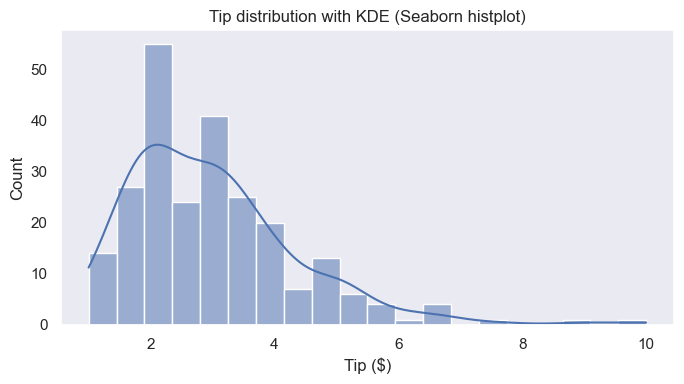

In [13]:
# %% Histogram — tips.tip distribution (Seaborn)
plt.figure(figsize=(7,4))
sns.histplot(tips['tip'], kde=True, bins=20)
plt.xlabel('Tip ($)')
plt.title('Tip distribution with KDE (Seaborn histplot)')
plt.tight_layout()
plt.show()


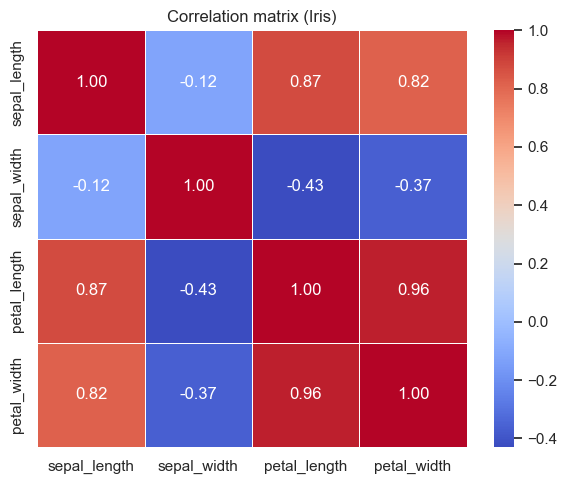

In [14]:
# %% Heatmap — correlation matrix (Iris numeric features)
# Compute correlation matrix
iris_num = iris.select_dtypes(include=[np.number])
corr = iris_num.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix (Iris)')
plt.tight_layout()
plt.show()


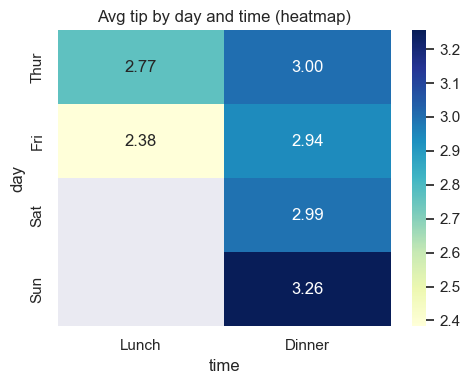

In [15]:
# Heatmap — pivot heatmap example (tips: average tip by day and time)
pivot = tips.pivot_table(index='day', columns='time', values='tip', aggfunc='mean')
plt.figure(figsize=(5,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Avg tip by day and time (heatmap)')
plt.tight_layout()
plt.show()


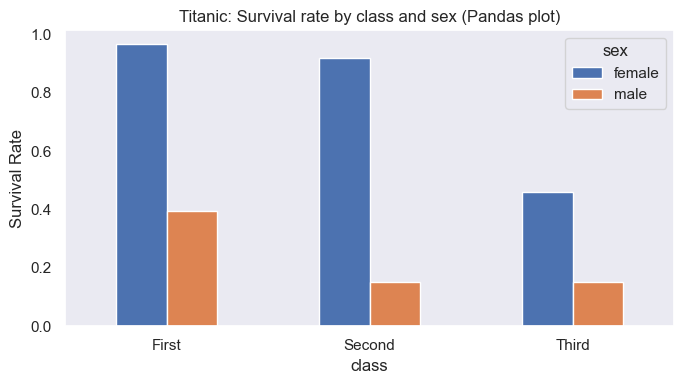

In [16]:
# %%  Multi-series example — stacked bar or grouped bar (titanic: survivors by class & sex)
titanic_grouped = titanic.groupby(['class','sex'])['survived'].mean().unstack()
titanic_grouped.plot(kind='bar', figsize=(7,4))
plt.ylabel('Survival Rate')
plt.title('Titanic: Survival rate by class and sex (Pandas plot)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
# %%
plt.figure(figsize=(6,4))
sns.histplot(tips['tip'], kde=False, bins=15)
plt.title('Tip Histogram (save as PNG)')
plt.tight_layout()
plt.savefig('tip_histogram.png', dpi=150)
plt.close()
print("Saved tip_histogram.png")


Saved tip_histogram.png


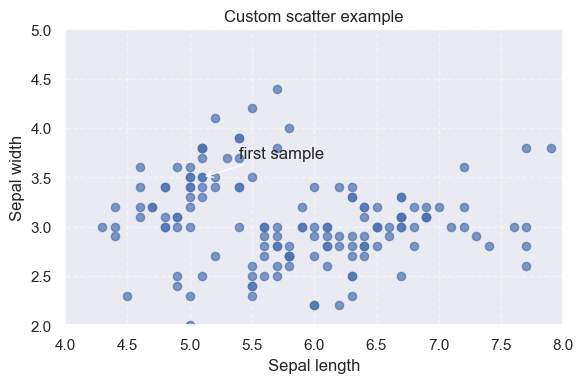

In [18]:
# %% 
# Add grid, change labels, limit axes, annotate points
plt.figure(figsize=(6,4))
plt.scatter(iris['sepal_length'], iris['sepal_width'], s=35, alpha=0.7)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Custom scatter example')
plt.xlim(4, 8)
plt.ylim(2, 5)
plt.grid(True, linestyle='--', alpha=0.5)
# annotate the first point
plt.annotate('first sample', xy=(iris['sepal_length'][0], iris['sepal_width'][0]),
             xytext=(iris['sepal_length'][0]+0.3, iris['sepal_width'][0]+0.2),
             arrowprops=dict(arrowstyle='->', lw=1))
plt.tight_layout()
plt.show()
